In [1]:
import json
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials


client_id = "6aaba5de97404ad29993336d940f4d54"
client_secret = "9aace866ec2445c285f7d39b656c6197"

CCM = SpotifyClientCredentials(client_id, client_secret)

sp = spotipy.Spotify(client_credentials_manager = CCM)

playlist_id = "spotify:playlist:37i9dQZF1ELZNku4LD5AGd" #my 2020 wrapped
#playlist_id = "spotify:playlist:37i9dQZF1DWWBHeXOYZf74" # pollen
#playlist_id = "spotify:playlist:1stafCQdVnA247SPFYaeOu" #mica's 
#playlist_id = "spotify:playlist:45lAvyhSgdYF8diPQdzK8W" #death metal
#playlist_id = "spotify:playlist:1nHwOraiPbMFqmMCQ8227u" #stuff I can't understand
#playlist_id = "spotify:playlist:74sUjcvpGfdOvCHvgzNEDO" #lofi

results = sp.playlist(playlist_id)
print(results['tracks']['items'])
print(len(results['tracks']['items']))

[{'added_at': '2020-11-27T10:35:37Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'}, 'href': 'https://api.spotify.com/v1/users/', 'id': '', 'type': 'user', 'uri': 'spotify:user:'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NjfafEappzvGGGDdMRJMP'}, 'href': 'https://api.spotify.com/v1/artists/2NjfafEappzvGGGDdMRJMP', 'id': '2NjfafEappzvGGGDdMRJMP', 'name': 'Azizi Gibson', 'type': 'artist', 'uri': 'spotify:artist:2NjfafEappzvGGGDdMRJMP'}], 'available_markets': ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG', 'BH', 'BO', 'BR', 'BY', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'KZ', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM'

In [2]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

trs = get_playlist_tracks('chillhopmusic', 'spotify:playlist:74sUjcvpGfdOvCHvgzNEDO')
len(trs)

250

In [3]:
results['tracks']['items']

[{'added_at': '2020-11-27T10:35:37Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NjfafEappzvGGGDdMRJMP'},
      'href': 'https://api.spotify.com/v1/artists/2NjfafEappzvGGGDdMRJMP',
      'id': '2NjfafEappzvGGGDdMRJMP',
      'name': 'Azizi Gibson',
      'type': 'artist',
      'uri': 'spotify:artist:2NjfafEappzvGGGDdMRJMP'}],
    'available_markets': ['AD',
     'AE',
     'AL',
     'AR',
     'AT',
     'AU',
     'BA',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'BY',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     

In [4]:
ids = [item['track']['id'] for item in results['tracks']['items']]

song_meta = {'id':[], 'album':[], 'name':[], 'artist':[], 'explicit':[], 'popularity':[]}

N = len(ids)
print(N)
i = 0 

for song_id in ids :
    if i % 5 == 0:
        print('Progress: %f' % (i / N))
    meta = sp.track(song_id)
    
    song_meta['id'].append(song_id)
    
    album = meta['album']['name']
    song_meta['album'].append(album)
    
    song = meta['name']
    song_meta['name'].append(song)
    
    sep = ', '
    artists = sep.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist'].append(artists)
    
    explicit = meta['explicit']
    song_meta['explicit'].append(explicit)
    
    pop = meta['popularity']
    song_meta['popularity'].append(pop)
    
    i += 1
    
    

100
Progress: 0.000000
Progress: 0.050000
Progress: 0.100000
Progress: 0.150000
Progress: 0.200000
Progress: 0.250000
Progress: 0.300000
Progress: 0.350000
Progress: 0.400000
Progress: 0.450000
Progress: 0.500000
Progress: 0.550000
Progress: 0.600000
Progress: 0.650000
Progress: 0.700000
Progress: 0.750000
Progress: 0.800000
Progress: 0.850000
Progress: 0.900000
Progress: 0.950000


In [5]:
#print(song_meta)
print(song_meta.keys())
for item in song_meta.keys():
    print(len(song_meta[item]))

dict_keys(['id', 'album', 'name', 'artist', 'explicit', 'popularity'])
100
100
100
100
100
100


In [6]:
song_meta_df = pd.DataFrame.from_dict(song_meta)
song_meta_df.head()

,id,album,name,artist,explicit,popularity
0,1GjxsQmRWf0lGnmAPurrZO,Reaping The Benefits,Kamikaze,Azizi Gibson,True,43
1,7HX5nHaPkrVUc3DBs8YXqS,Discover,Ocean Drive,C Y G N,False,36
2,4KVON5zzEpAeF9tD7EDWd7,Theme from Dissect S5,Theme from Dissect S5,Birocratic,False,35
3,0nQ7GqFn1SIrYY4KZb2h7u,Diamonds,Gin,"Oatmello, Cloudchord",False,53
4,3PvyV1dHXMy9Zzex60w21i,it's 2am she's on my mind,i still have all our old texts,frumhere,False,44


In [7]:
features = sp.audio_features(song_meta['id'])
# this turns out a list of dicts, need to change it to dict with list values

In [8]:
print(features[:2])

[{'danceability': 0.606, 'energy': 0.494, 'key': 5, 'loudness': -9.605, 'mode': 0, 'speechiness': 0.304, 'acousticness': 0.403, 'instrumentalness': 0, 'liveness': 0.111, 'valence': 0.634, 'tempo': 158.905, 'type': 'audio_features', 'id': '1GjxsQmRWf0lGnmAPurrZO', 'uri': 'spotify:track:1GjxsQmRWf0lGnmAPurrZO', 'track_href': 'https://api.spotify.com/v1/tracks/1GjxsQmRWf0lGnmAPurrZO', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1GjxsQmRWf0lGnmAPurrZO', 'duration_ms': 198066, 'time_signature': 3}, {'danceability': 0.621, 'energy': 0.417, 'key': 4, 'loudness': -10.415, 'mode': 0, 'speechiness': 0.278, 'acousticness': 0.778, 'instrumentalness': 0.137, 'liveness': 0.378, 'valence': 0.659, 'tempo': 91.029, 'type': 'audio_features', 'id': '7HX5nHaPkrVUc3DBs8YXqS', 'uri': 'spotify:track:7HX5nHaPkrVUc3DBs8YXqS', 'track_href': 'https://api.spotify.com/v1/tracks/7HX5nHaPkrVUc3DBs8YXqS', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7HX5nHaPkrVUc3DBs8YXqS', 'duration_ms':

In [9]:
features_dict = {}

for k in features[0].keys():
    #build dict keys
    features_dict[k] = []

for song in features:
    # i had one song that was None so this skips over it
    if song != None:
        for k in song.keys():
            features_dict[k].append(song[k])
print(features_dict)

{'danceability': [0.606, 0.621, 0.599, 0.633, 0.522, 0.598, 0.783, 0.686, 0.291, 0.6, 0.42, 0.752, 0.714, 0.811, 0.66, 0.583, 0.666, 0.646, 0.555, 0.878, 0.345, 0.637, 0.544, 0.788, 0.627, 0.722, 0.537, 0.494, 0.514, 0.5, 0.287, 0.6, 0.493, 0.564, 0.763, 0.812, 0.818, 0.659, 0.77, 0.694, 0.474, 0.586, 0.509, 0.905, 0.686, 0.487, 0.667, 0.484, 0.462, 0.772, 0.633, 0.78, 0.302, 0.543, 0.777, 0.703, 0.359, 0.318, 0.479, 0.599, 0.516, 0.788, 0.517, 0.727, 0.771, 0.557, 0.856, 0.481, 0.807, 0.682, 0.716, 0.715, 0.74, 0.797, 0.416, 0.729, 0.721, 0.689, 0.565, 0.783, 0.46, 0.602, 0.726, 0.554, 0.846, 0.884, 0.527, 0.577, 0.775, 0.886, 0.677, 0.564, 0.496, 0.639, 0.728, 0.704, 0.708, 0.755, 0.736], 'energy': [0.494, 0.417, 0.31, 0.333, 0.234, 0.357, 0.365, 0.446, 0.43, 0.479, 0.701, 0.338, 0.483, 0.429, 0.45, 0.321, 0.882, 0.56, 0.754, 0.22, 0.184, 0.493, 0.437, 0.513, 0.566, 0.31, 0.859, 0.596, 0.632, 0.311, 0.87, 0.648, 0.489, 0.771, 0.491, 0.439, 0.258, 0.444, 0.67, 0.395, 0.405, 0.193, 0.8

In [10]:

print(len(features_dict['id']))

#print(features[41])
    

99


In [11]:
features_df = pd.DataFrame.from_dict(features_dict)
 

In [12]:
features_df['duration'] = features_df['duration_ms'] / 60000.0

In [13]:
df = song_meta_df.merge(features_df, left_on = 'id', right_on = 'id')

In [14]:
pd.options.display.max_columns = 100
df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,duration
0,1GjxsQmRWf0lGnmAPurrZO,Reaping The Benefits,Kamikaze,Azizi Gibson,True,43,0.606,0.494,5,-9.605,0,0.3040,0.403,0.0000,0.111,0.634,158.905,audio_features,spotify:track:1GjxsQmRWf0lGnmAPurrZO,https://api.spotify.com/v1/tracks/1GjxsQmRWf0l...,https://api.spotify.com/v1/audio-analysis/1Gjx...,198066,3,3.301100
1,7HX5nHaPkrVUc3DBs8YXqS,Discover,Ocean Drive,C Y G N,False,36,0.621,0.417,4,-10.415,0,0.2780,0.778,0.1370,0.378,0.659,91.029,audio_features,spotify:track:7HX5nHaPkrVUc3DBs8YXqS,https://api.spotify.com/v1/tracks/7HX5nHaPkrVU...,https://api.spotify.com/v1/audio-analysis/7HX5...,189562,4,3.159367
2,4KVON5zzEpAeF9tD7EDWd7,Theme from Dissect S5,Theme from Dissect S5,Birocratic,False,35,0.599,0.310,1,-9.286,1,0.0297,0.248,0.8750,0.121,0.765,91.971,audio_features,spotify:track:4KVON5zzEpAeF9tD7EDWd7,https://api.spotify.com/v1/tracks/4KVON5zzEpAe...,https://api.spotify.com/v1/audio-analysis/4KVO...,131776,4,2.196267
3,0nQ7GqFn1SIrYY4KZb2h7u,Diamonds,Gin,"Oatmello, Cloudchord",False,53,0.633,0.333,7,-13.933,1,0.0646,0.626,0.3460,0.116,0.574,81.015,audio_features,spotify:track:0nQ7GqFn1SIrYY4KZb2h7u,https://api.spotify.com/v1/tracks/0nQ7GqFn1SIr...,https://api.spotify.com/v1/audio-analysis/0nQ7...,130370,4,2.172833
4,3PvyV1dHXMy9Zzex60w21i,it's 2am she's on my mind,i still have all our old texts,frumhere,False,44,0.522,0.234,10,-19.862,1,0.2950,0.638,0.0023,0.188,0.170,79.484,audio_features,spotify:track:3PvyV1dHXMy9Zzex60w21i,https://api.spotify.com/v1/tracks/3PvyV1dHXMy9...,https://api.spotify.com/v1/audio-analysis/3Pvy...,112000,4,1.866667


In [15]:
music_features = df[['popularity','danceability', 'energy', 'loudness', 'speechiness',
 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration']]
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_features.loc[:]=min_max_scaler.fit_transform(music_features.loc[:])

C:\Users\patno_000\Anaconda3.1\envs\main\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [16]:
music_features.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.546306,0.560966,0.479760,0.580924,0.165727,0.447603,0.406862,0.145339,0.434707,0.341409,0.388887
std,0.218013,0.231101,0.223537,0.187990,0.201401,0.287166,0.383353,0.188747,0.264766,0.303618,0.197302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421687,0.396440,0.303318,0.470898,0.027563,0.211902,0.000728,0.047955,0.200121,0.110050,0.250388
50%,0.566265,0.569579,0.456600,0.605300,0.069775,0.463335,0.359667,0.066864,0.454655,0.206978,0.376882
75%,0.716867,0.729773,0.625511,0.711583,0.263664,0.690189,0.811331,0.149055,0.634220,0.609614,0.505245
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


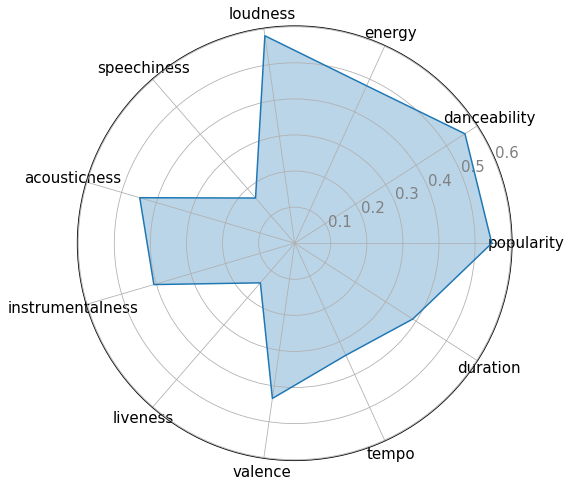

In [17]:
from math import pi
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_features.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

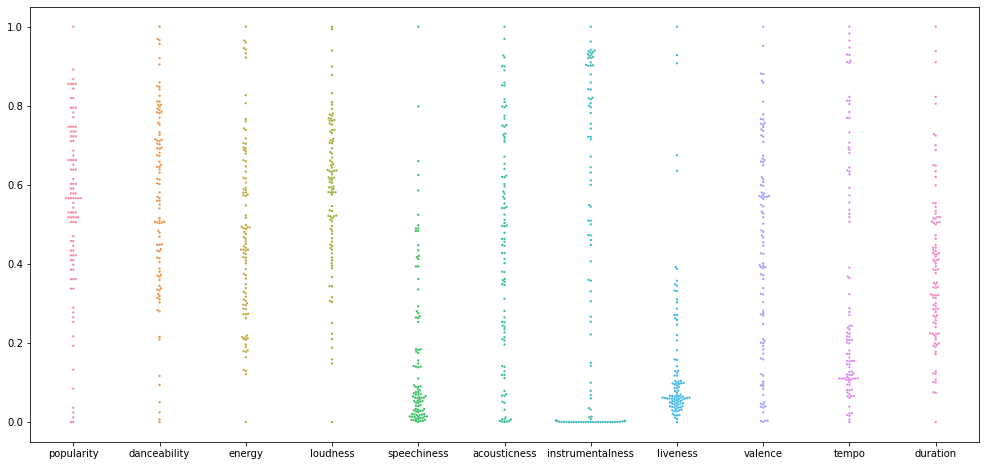

In [29]:
import seaborn as sns
plt.figure(figsize=(17,8))
sns.swarmplot(data=music_features, size=2.3)
plt.show()